<a href="https://colab.research.google.com/github/wahyuvlntn/Water-Quality-Classification/blob/main/Proyek_Akhir_JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bab 8 Backpropagation (1)

In [ ]:
!gdown 1D6ND9-naeS4ADHs_4UamldFAzTRzGf7p

Downloading...
From: https://drive.google.com/uc?id=1D6ND9-naeS4ADHs_4UamldFAzTRzGf7p
To: /content/waterQuality1.csv
100% 841k/841k [00:00<00:00, 113MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv("waterQuality1.csv")
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [ ]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Tidak ada null value pada dataset

In [ ]:
data['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

Setelah dicek value dari kolom 'is_safe' ternyata terdapat value yang bermasalah yang ditandai dengan #NUM!

In [ ]:
data = data[data['is_safe'].isin(['0','1'])]

In [ ]:
data['ammonia']=data['ammonia'].astype('float64')
data['is_safe']=data['is_safe'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

Berikut adalah dataset yang telah dibersihkan dan ditranformasikan

In [ ]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


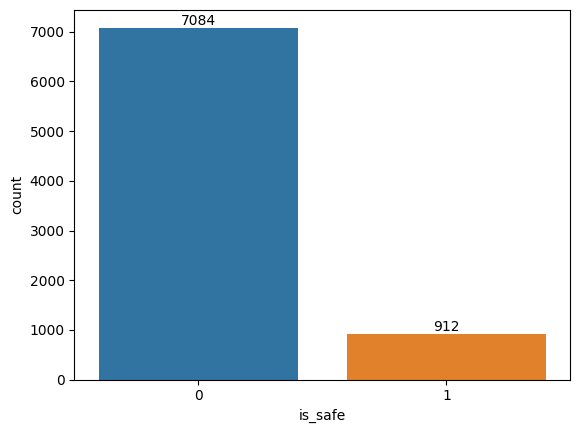

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.countplot(data = data, x = 'is_safe')
abs_values = data['is_safe'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.show()

Terlihat bahwa terdapat imbalanced data sehingga harus disamakan

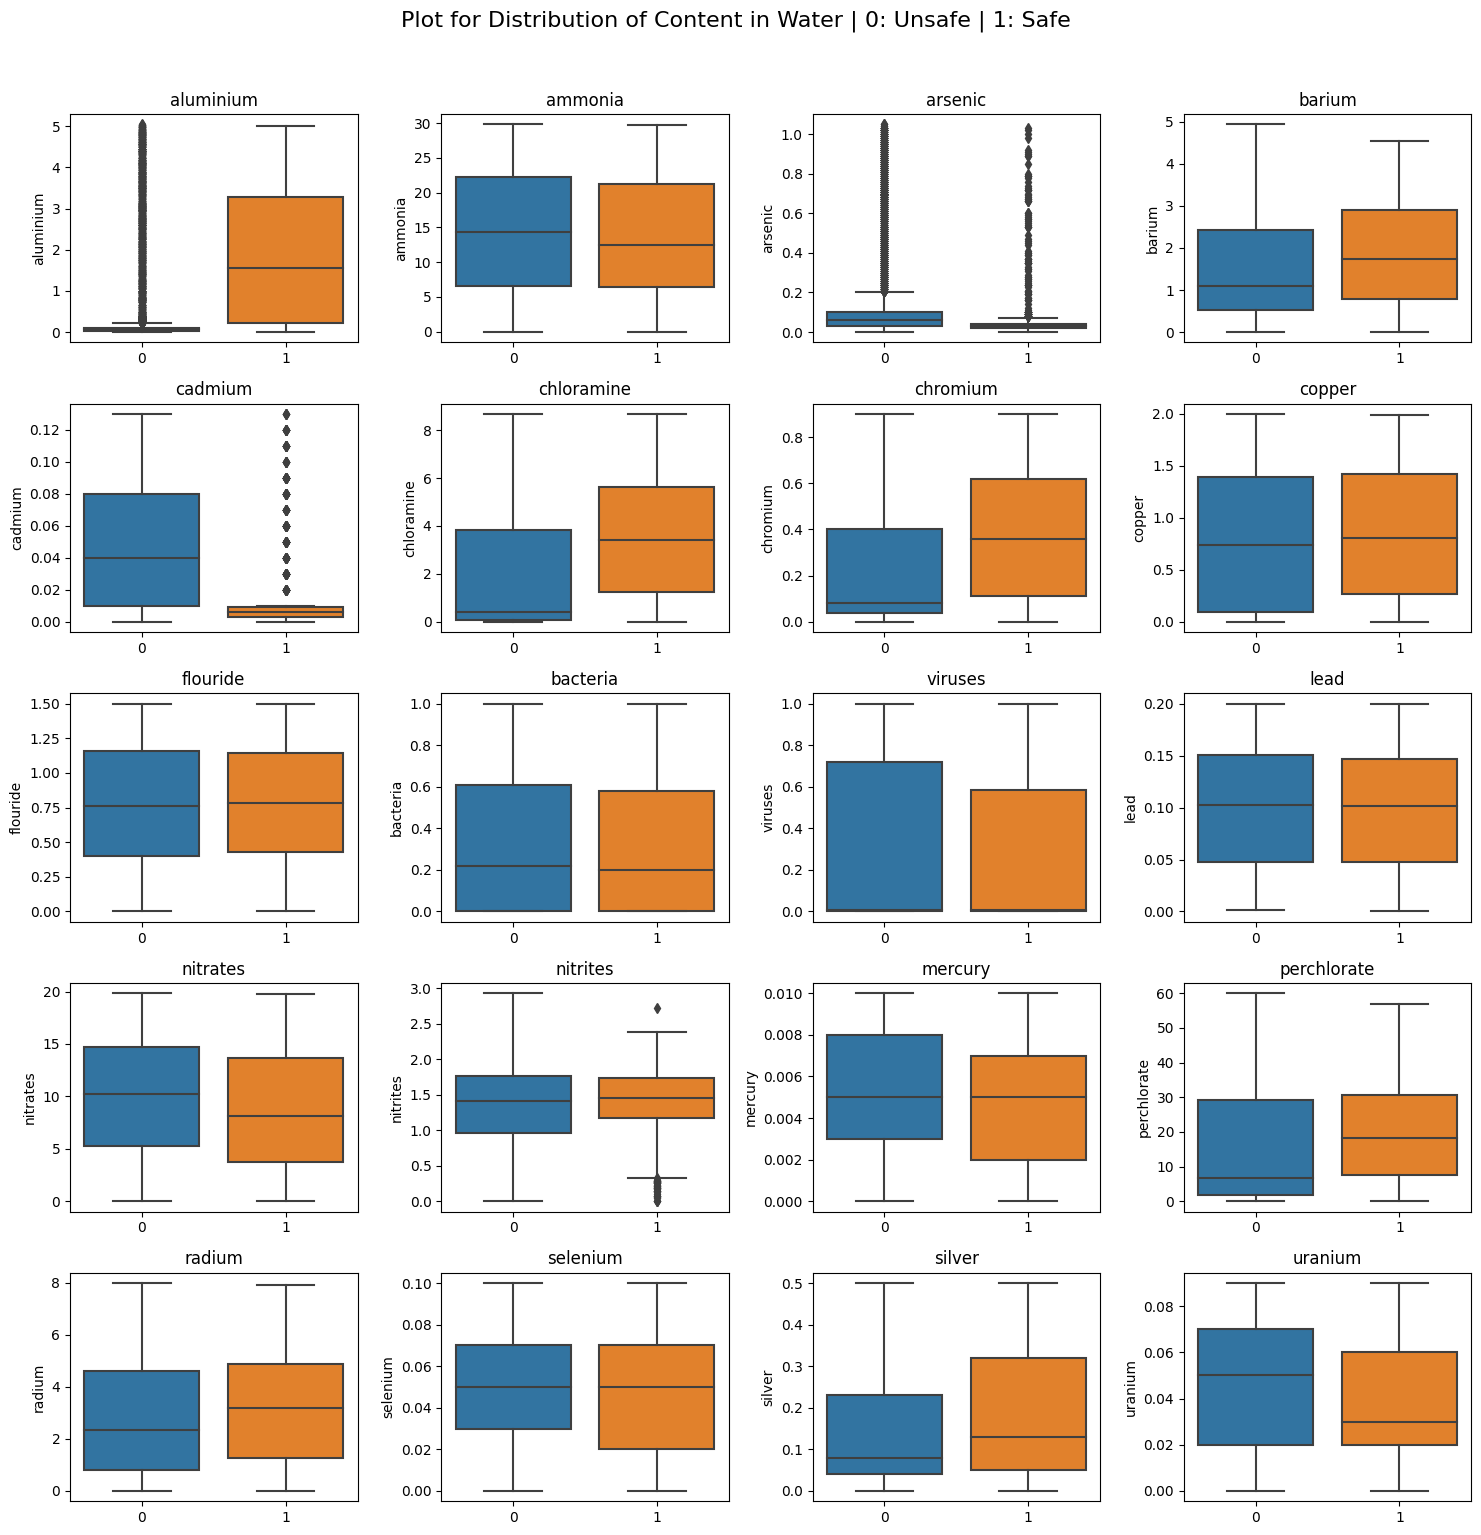

In [ ]:
columns_to_plot = data.columns.tolist()
columns_to_plot.remove('is_safe')

num_rows = 5
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data=data, x='is_safe', y=col, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')

    #axes[row_index, col_index].set_ylabel(col)

plt.suptitle("Plot for Distribution of Content in Water | 0: Unsafe | 1: Safe", y=1.02, fontsize=16)


plt.tight_layout()
plt.show()

Terlihat bahwa terdapat outlier yang cukup banyak pada aluminium, arsenic, cadmium, dan nitrites

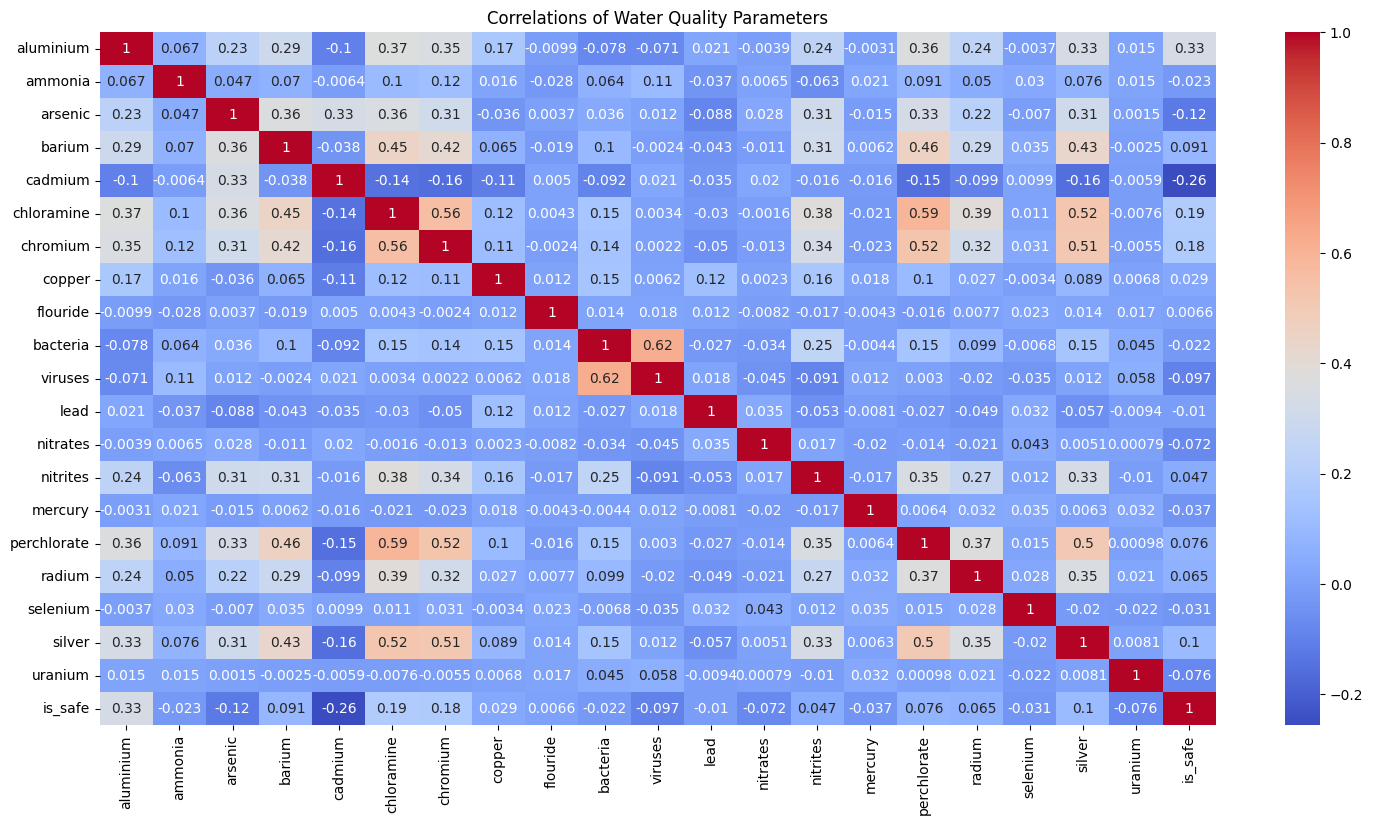

In [ ]:
correlation_matrix = data.corr()

# Membuat heatmap
plt.figure(figsize=(18, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Menambahkan judul
plt.title("Correlations of Water Quality Parameters")
plt.show()

Terlihat bahwa terdapat korelasi yang cukup besar antara bacteria dan viruses

In [ ]:
import numpy as np
def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
  for i, x in enumerate(lbl):
    enc[i, x - mi] = 1
  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



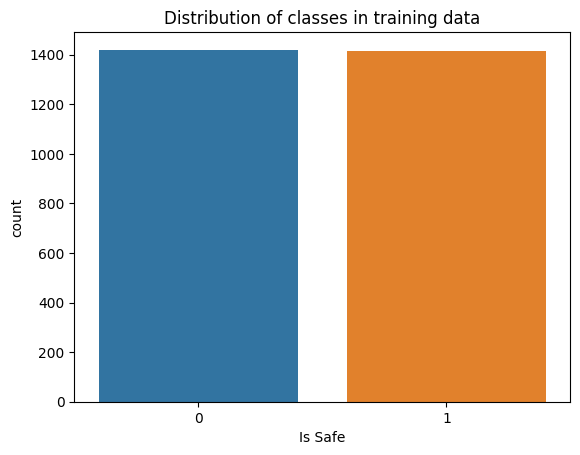

In [ ]:
sns.countplot(x = y_test)
plt.title("Distribution of classes in training data")
plt.xlabel("Is Safe")
plt.show()

Dengan menggunakan SMOTE, data telah diseimbangkan dengan cara menambahkan data pada kolom yang tidak seimbang

### a) Fungsi Training Backpropagation

In [ ]:
import numpy as np

In [ ]:
def sig(X):
  return [1 / (1 + np.exp(-x)) for x in X]

def sigd(X):
  output = []
  for i, x in enumerate(X):
    s = sig([x])[0]
    output.append(s * (1 - s))
  return output

In [ ]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  d = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  epoch = 0
  mse = 1

  for i in range(0, len(n)-1):
    n[i][-1] = 1

  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0
    for r in range(len(X)):
      n[0][:-1] = X[r]

      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])

      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])
      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

      for L in range(len(layer_conf) - 1, 1, -1):
        din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

      w += dw

    mse /= len(X)
    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')
  return w, epoch, mse


In [ ]:
def bp_predict(X, w):
  n = [np.empty(len(i)) for i in w]
  nin = [np.empty(len(i[0])) for i in w]
  predict = []
  n.append(np.empty(len(w[-1][0])))
  for x in X:
    n[0][:-1] = x
    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L + 1][:len(nin[L])] = sig(nin[L])
    predict.append(n[-1].copy())
  return predict

In [ ]:
y_train = onehot_enc(y_train)
y_test = onehot_enc(y_test)

In [ ]:
#INI UNTUK PENGUJIAN, KALO MAU NGUJI HARUS DELETE RUNTIME DULU BARU DIJALANIN LAGI
#Contoh: pertama nguji tuning layer_conf=(20, 10, 2), learn_rate=.2, max_epoch=500, max_error=.01
#terus mau nguji tuning kedua layer_conf=(20, 5, 2), learn_rate=.1, max_epoch=500, max_error=.1, sebelum dijalanin harus delete runtime dulu

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

w, ep, mse = bp_fit(X_train, y_train, layer_conf=(20, 10, 2), learn_rate=.2, max_epoch=500, max_error=.01, print_per_epoch=25)
print(f'Epochs: {ep}, MSE: {mse}')
predict = bp_predict(X_test, w)
predict = onehot_dec(predict)

y_test = onehot_dec(y_test)

report = classification_report(y_test, predict)
print(report)
# conf_matrix = confusion_matrix(y_test, predict)
# print(conf_matrix)
# accuracy = accuracy_score(predict, y_test)
# print('Output:', predict)
# print('True :', y_test)
# print('Accuracy:', accuracy)


<ipython-input-19-3d92058c117e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
<ipython-input-19-3d92058c117e>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epoch 25, MSE: 0.08116268344555011
Epoch 50, MSE: 0.07126630958991649
Epoch 75, MSE: 0.06836897805922358
Epoch 100, MSE: 0.06506243924519411
Epoch 125, MSE: 0.06281115749968398
Epoch 150, MSE: 0.06165414844820874
Epoch 175, MSE: 0.06285704339574108
Epoch 200, MSE: 0.061932811428472616
Epoch 225, MSE: 0.05996246170486569
Epoch 250, MSE: 0.06162993738815833
Epoch 275, MSE: 0.05982561764323995
Epoch 300, MSE: 0.06048508682110507
Epoch 325, MSE: 0.05903771799524217
Epoch 350, MSE: 0.0580423511622299
Epoch 375, MSE: 0.05847262395323896
Epoch 400, MSE: 0.05695895025972137
Epoch 425, MSE: 0.05836718280889101
Epoch 450, MSE: 0.05767953556133345
Epoch 475, MSE: 0.0589625451491508
Epoch 500, MSE: 0.058702653713245845
Epochs: 500, MSE: 0.058702653713245845
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1420
           1       0.93      0.95      0.94      1414

    accuracy                           0.94      2834
   macro avg       0.94   

<Axes: >

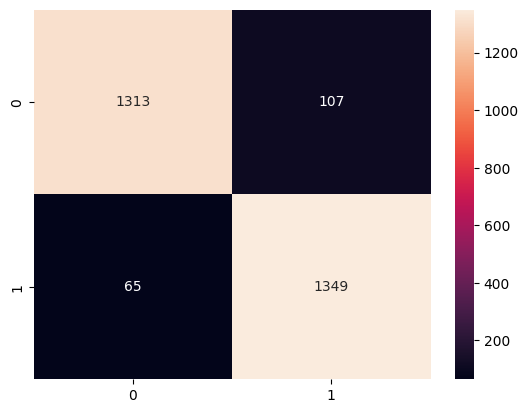

In [ ]:
conf_matrix = confusion_matrix(y_test, predict)
sns.heatmap(conf_matrix,annot=True, fmt = 'g')

Akurasi terbaik yang dihasilkan dari tuning layer_conf=(20, 10, 2), learn_rate=.2, max_epoch=500, max_error=.01 adalah 94%

### a) Fungsi *Binary Encoding* dan *Decoding*

Tulis kode ke dalam *cell* di bawah ini:

In [ ]:
def bin_enc(lbl):
  mi = min(lbl)
  length = len(bin(max(lbl) - mi + 1)[2:])
  enc = []
  for i in lbl:
    b = bin(i - mi)[2:].zfill(length)
    enc.append([int(n) for n in b])
  return enc

def bin_dec(enc, mi=0):
  lbl = []
  for e in enc:
    rounded = [int(round(x)) for x in e]
    string = ''.join(str(x) for x in rounded)
    num = int(string, 2) + mi
    lbl.append(num)
  return lbl